In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
S105_12 = np.loadtxt("PA6_08long_105_1.csv", skiprows=1, delimiter=",")
S105_10 = np.loadtxt("PA6_08long_105_2.csv", skiprows=1, delimiter=",")

S115_10 = np.loadtxt("PA6_08long_115_1.csv", skiprows=1, delimiter=",")
S115_12 = np.loadtxt("PA6_08long_115_2.csv", skiprows=1, delimiter=",")

S125_10 = np.loadtxt("PA6_08long_125_1.csv", skiprows=1, delimiter=",")
#S105_12 = np.loadtxt("PA6_08long_105_2.csv", skiprows=1, delimiter=",")

S135_08 = np.loadtxt("PA6_08long_135_1.csv", skiprows=1, delimiter=",")
S135_10 = np.loadtxt("PA6_08long_135_2.csv", skiprows=1, delimiter=",")

In [3]:
S105_10_load, S105_10_ext = S105_10[:,1], S105_10[:,2]
S105_12_load, S105_12_ext = S105_12[:,1], S105_12[:,2]

S115_10_load, S115_10_ext = S115_10[:,1], S115_10[:,2]
S115_12_load, S115_12_ext = S115_12[:,1], S115_12[:,2]

S125_10_load, S125_10_ext = S125_10[:,1], S125_10[:,2]

S135_08_load, S135_08_ext = S135_08[:,1], S135_08[:,2]
S135_10_load, S135_10_ext = S135_10[:,1], S135_10[:,2]

In [7]:
loads = [S105_10_load, S105_12_load,
         S115_10_load, S115_12_load,
         S125_10_load, 
         S135_08_load, S135_10_load,]

displ = [S105_10_ext, S105_12_ext,
         S115_10_ext, S115_12_ext,
         S125_10_ext, 
         S135_08_ext, S135_10_ext,]

In [5]:
def stiffness_func(displacement, force, start_percentage, stop_percentage):
    max_force_index = np.argmax(force)
    max_displacement = displacement[max_force_index]
    max_force = force[max_force_index]

    start_index = int(start_percentage * max_force_index)
    stop_index = int(stop_percentage * max_force_index)

    displacement_range = displacement[start_index:stop_index]
    force_range = force[start_index:stop_index]

    def linear_fit(x, k, a):
        return k * x + a 

    params, covariance = curve_fit(linear_fit, displacement_range, force_range)

    predicted_force = linear_fit(displacement_range, *params)

    residuals = force_range - predicted_force
    ss_residual = np.sum(residuals**2)
    ss_total = np.sum((force_range - np.mean(force_range))**2)
    r_squared = 1 - (ss_residual / ss_total)
    
    plt.figure()
    plt.plot(displacement, force, linestyle='-', label='Force-Displacement Curve')
    plt.plot(displacement_range, linear_fit(displacement_range, *params), linestyle='-', color='r', label='Linear Fit')
    plt.scatter(max_displacement, max_force, color='red', label='Maximum force')
    plt.xlabel("Displacement [mm]")
    plt.ylabel("Force [N]")
    plt.title("Force-Displacement Curve")
    plt.grid()
    plt.legend()
    plt.show()
    
    print("R-squared value:", r_squared)
    
    stiffness = params[0]

    max_force_index = np.argmax(force)

    energy = np.trapz(force[:max_force_index], displacement[:max_force_index])

    return stiffness, max_force, energy 

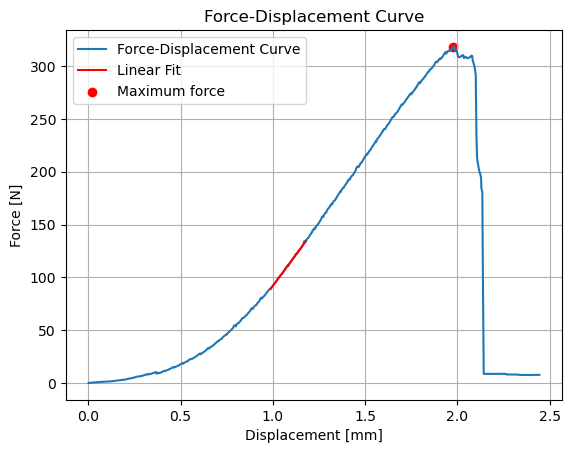

R-squared value: 0.9991308122355744


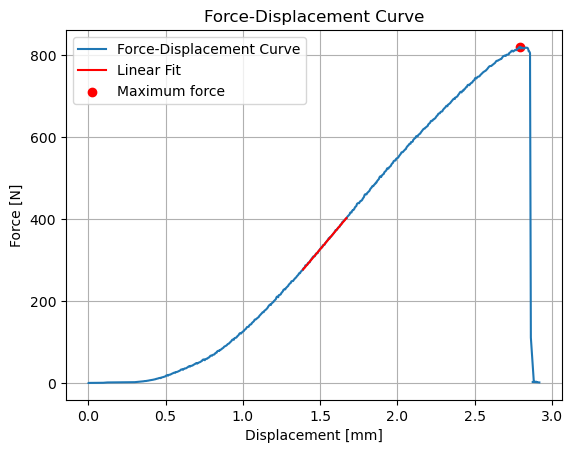

R-squared value: 0.9991380212065911


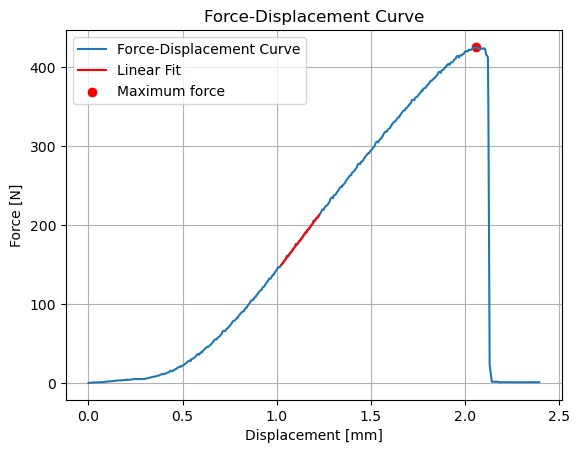

R-squared value: 0.9982850442703796


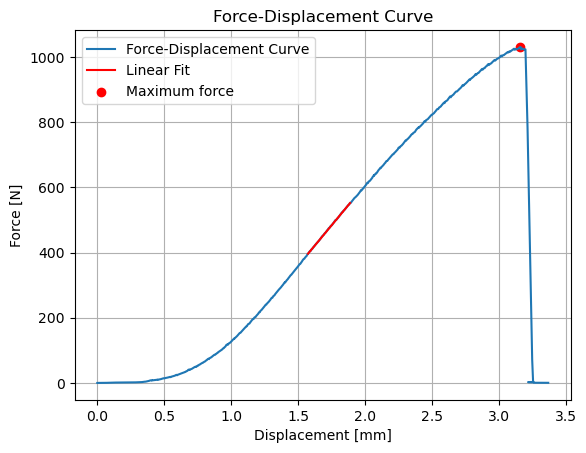

R-squared value: 0.9998112304549368


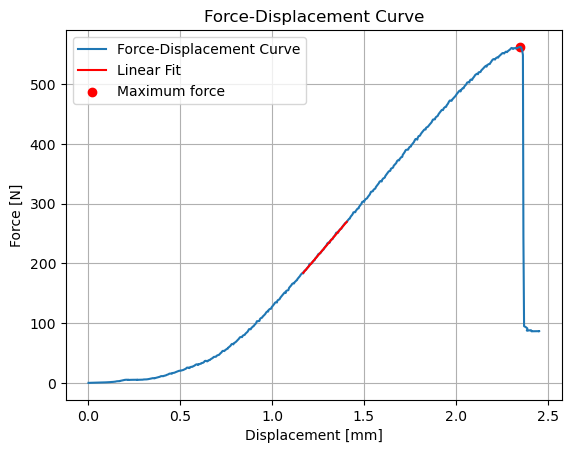

R-squared value: 0.9990308958120943


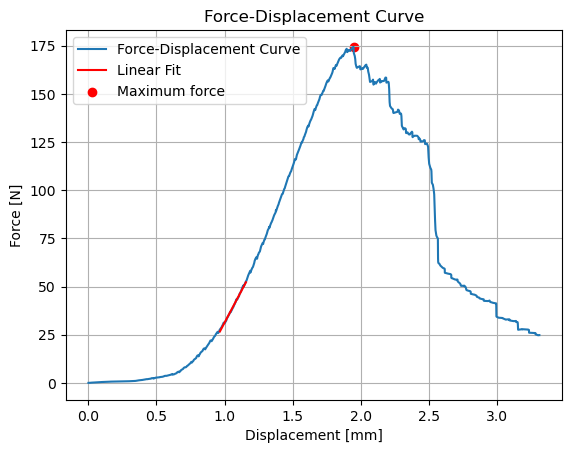

R-squared value: 0.9963141039965311


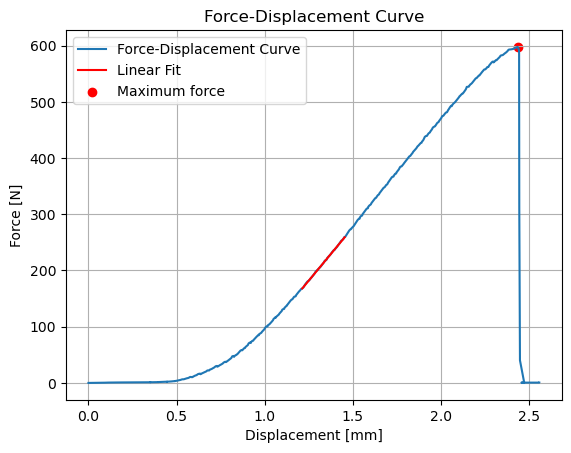

R-squared value: 0.9995588864951462


In [8]:
def make_lists(force, displacement, start, stop, stiffness_m, strength_m, energy_m):
    stiffness, max_force, energy = stiffness_func(force, displacement, start, stop)
    stiffness_m.append(stiffness)
    strength_m.append(max_force)
    energy_m.append(energy)

k_all = []
strength = []
e = []

for i in range(len(loads)):
    make_lists(displ[i], loads[i], 0.5, 0.6, k_all, strength, e)

In [34]:
from sklearn.metrics import r2_score

def estimated_curve(x, a, b,):
    """Function to fit: a * x^b"""
    return a * x**b 

def plot_and_fit(scale, data):
    popt, pcov = curve_fit(estimated_curve, scale, data)

    a_optimal, b_optimal = popt

    x_fit = np.linspace(min(scale), max(scale), 100)
    y_fit = estimated_curve(x_fit, a_optimal, b_optimal)
    
    y_predicted = estimated_curve(scale, *popt)
    r_squared = r2_score(data, y_predicted)

    return a_optimal, b_optimal, r_squared, x_fit, y_fit

In [35]:
densities = [.025, .038, .055]

## Density scale

In [40]:
parameters_a1 = []
parameters_b1 = []
r_squared_values1 = []
x_fit_values1 = []
y_fit_values1 = []
for scale, data in zip([densities[1:3], densities[1:3],densities[0:2], densities[1:3], densities[1:3],densities[0:2], densities[1:3], densities[1:3],densities[0:2]],
                       
                       [k_all[0:2], k_all[2:4], k_all[5:], strength[0:2], strength[2:4], strength[5:], e[0:2], e[2:4], e[5:]]):
    
    a_optimal, b_optimal, r_squared, x_fit, y_fit = plot_and_fit(scale, data)
    parameters_a1.append(a_optimal)
    parameters_b1.append(b_optimal)
    r_squared_values1.append(r_squared)
    x_fit_values1.append(x_fit)
    y_fit_values1.append(y_fit)

# Print the results
for i, (a, b, r_squared) in enumerate(zip(parameters_a1, parameters_b1, r_squared_values1), 1):
    #print(f"Curve {i}: a = {a:.4f}, b = {b:.2f}, R-squared = {r_squared:.2f}")
    print(f"Curve {i}: a = {a:.3}, b = {b:.2f}, R-squared = {r_squared:.3f}")
    print()


Curve 1: a = 6.55e+04, b = 1.72, R-squared = 1.000

Curve 2: a = 1.78e+04, b = 1.23, R-squared = 1.000

Curve 3: a = 1.29e+06, b = 2.49, R-squared = 1.000

Curve 4: a = 1.37e+06, b = 2.56, R-squared = 1.000

Curve 5: a = 1.07e+06, b = 2.39, R-squared = 1.000

Curve 6: a = 9.02e+06, b = 2.94, R-squared = 1.000

Curve 7: a = 4.29e+07, b = 3.71, R-squared = 1.000

Curve 8: a = 5.38e+07, b = 3.65, R-squared = 1.000

Curve 9: a = 1.5e+08, b = 3.84, R-squared = 1.000



c:\Users\Bruker\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\Users\Bruker\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\Users\Bruker\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\Users\Bruker\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\Users\Bruker\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters

(0.0, 512.9076829227567)

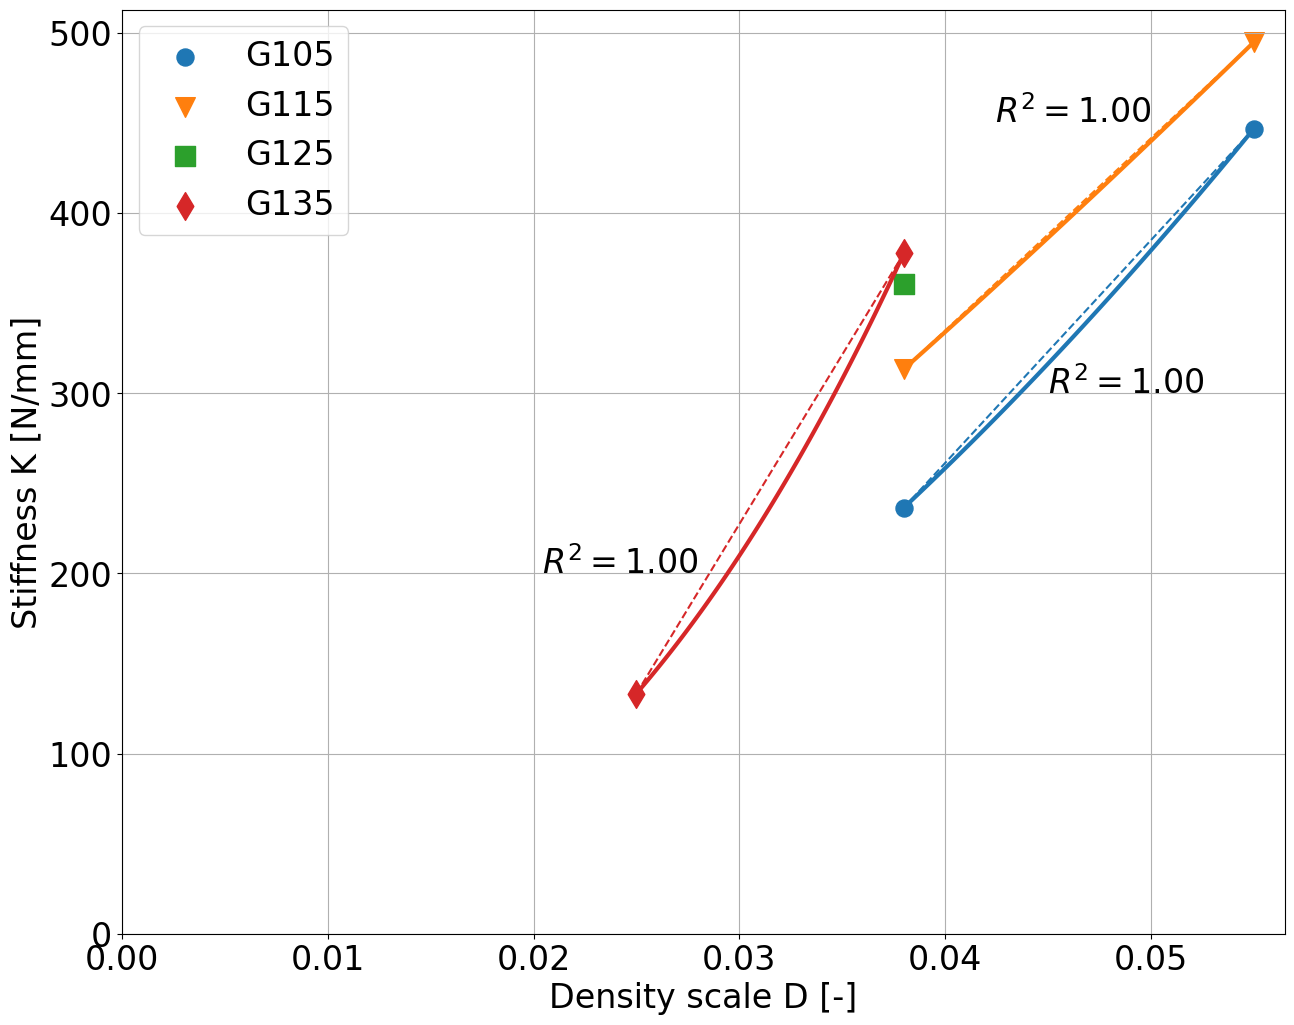

In [104]:
plt.rcParams.update({'font.size': 24})
fig, (ax1) = plt.subplots(1,1, figsize=(15,12))

ax1.scatter(densities[1:3], k_all[0:2], label="G105", s=150)
ax1.scatter(densities[1:3],k_all[2:4], label="G115", s=200, marker = "v")
ax1.scatter(densities[1],k_all[4], label="G125", s=200, marker = "s")
ax1.scatter(densities[0:2],k_all[5:], label="G135", s=200, marker = "d")

ax1.plot(densities[1:3], k_all[0:2],  linewidth=1.5, linestyle = "dashed")
ax1.plot(densities[1:3],k_all[2:4],  linewidth=1.5, linestyle = "dashed")
ax1.plot(densities[1],k_all[4],  linewidth=1.5, linestyle = "dashed")
ax1.plot(densities[0:2],k_all[5:],  linewidth=1.5, linestyle = "dashed")

#Plotting R^2-values and curve-fits on existing plots
colors = ["C0", "C1", "C3", "C3"]

for i in range(3):
    ax1.plot(x_fit_values1[i], y_fit_values1[i], linewidth=3, c = colors[i])


ax1.text(0.045, 300, "$R^2=1.00$")
ax1.text(0.05, 450, "$R^2=1.00$", ha = "right")
ax1.text(0.028, 200, "$R^2=1.00$", ha = "right")

#Plotting densities
"""
ax1.text(.025, k_all[5], " D.025 ", ha="right")

ax1.text(.038, k_all[0], "  D.038 ", ha="right")
ax1.text(.038, k_all[2], "  D.038 ", ha="right")
ax1.text(.038, k_all[4], "  D.038 ", ha="right")
ax1.text(.038, k_all[6], "  D.038 ", ha="right")

ax1.text(.055, k_all[1], "  D.055 ", ha="right")
ax1.text(.055, k_all[3], "  D.055 ", ha="right")

x = np.linspace(0,.055, 100)
#ax1.plot(x, 1.78e+04*x**1.23)
#ax1.plot(x, 6.55e+04*x**1.72)
"""
ax1.set_xlabel("Density scale D [-]")
ax1.set_ylabel("Stiffness K [N/mm]")
ax1.legend(loc = "best")

ax1.grid()
ax1.set_xlim(0,None)
ax1.set_ylim(0,None)

(0.0, 1074.1485000000002)

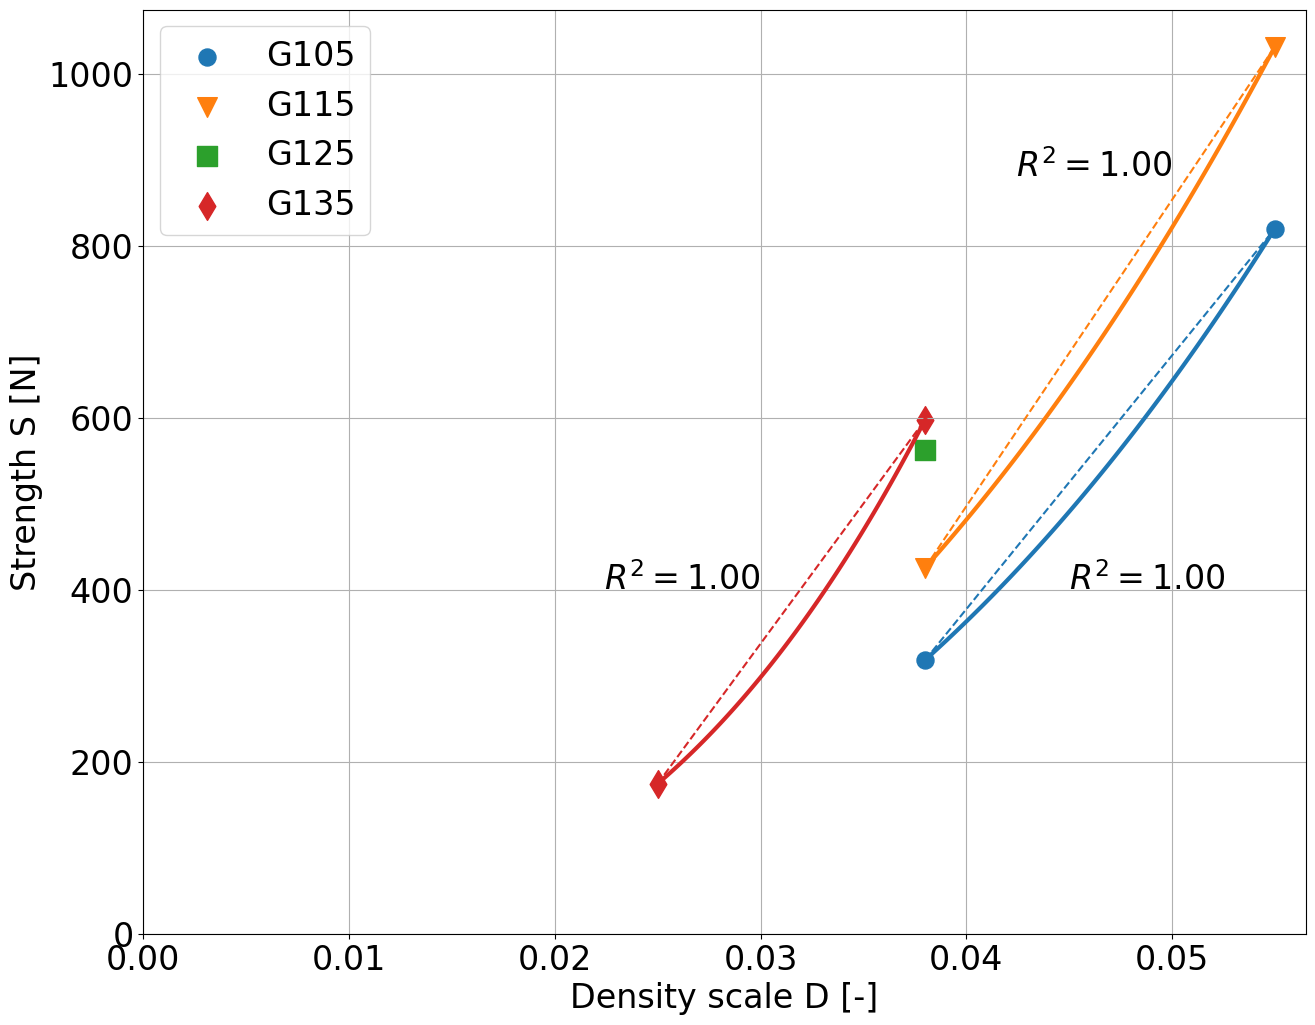

In [105]:
fig, (ax1) = plt.subplots(1,1, figsize=(15,12))

ax1.scatter(densities[1:3], strength[0:2], label="G105", s=150)
ax1.scatter(densities[1:3],strength[2:4], label="G115", s=200, marker = "v")
ax1.scatter(densities[1],strength[4], label="G125", s=200, marker = "s")
ax1.scatter(densities[0:2],strength[5:], label="G135", s=200, marker = "d")

ax1.plot(densities[1:3], strength[0:2],  linewidth=1.5, linestyle = "dashed")
ax1.plot(densities[1:3],strength[2:4],  linewidth=1.5, linestyle = "dashed")
ax1.plot(densities[1],strength[4],  linewidth=1.5, linestyle = "dashed")
ax1.plot(densities[0:2],strength[5:],  linewidth=1.5, linestyle = "dashed")

colors = ["C0", "C1", "C3", "C3"]

for i in range(3):
    ax1.plot(x_fit_values1[i+3], y_fit_values1[i+3], linewidth=3, c = colors[i])



ax1.text(0.045, 400, "$R^2=1.00$")
ax1.text(0.05, 880, "$R^2=1.00$", ha = "right")
ax1.text(0.03, 400, "$R^2=1.00$", ha = "right")
"""


ax1.text(.025, strength[5], " D.025 ", ha="right")

ax1.text(.038, strength[0], "  D.038 ", ha="right")
ax1.text(.038, strength[2], "  D.038 ", ha="right")
ax1.text(.038, strength[4], "  D.038 ", ha="right")
ax1.text(.038, strength[6], "  D.038 ", ha="right")

ax1.text(.055, strength[1], "  D.055 ", ha="right")
ax1.text(.055, strength[3], "  D.055 ", ha="right")

"""
ax1.set_xlabel("Density scale D [-]")
ax1.set_ylabel("Strength S [N]")
ax1.legend(loc = "best")

ax1.grid()
ax1.set_xlim(0,None)
ax1.set_ylim(0,None)

(0.0, 1428.448276979398)

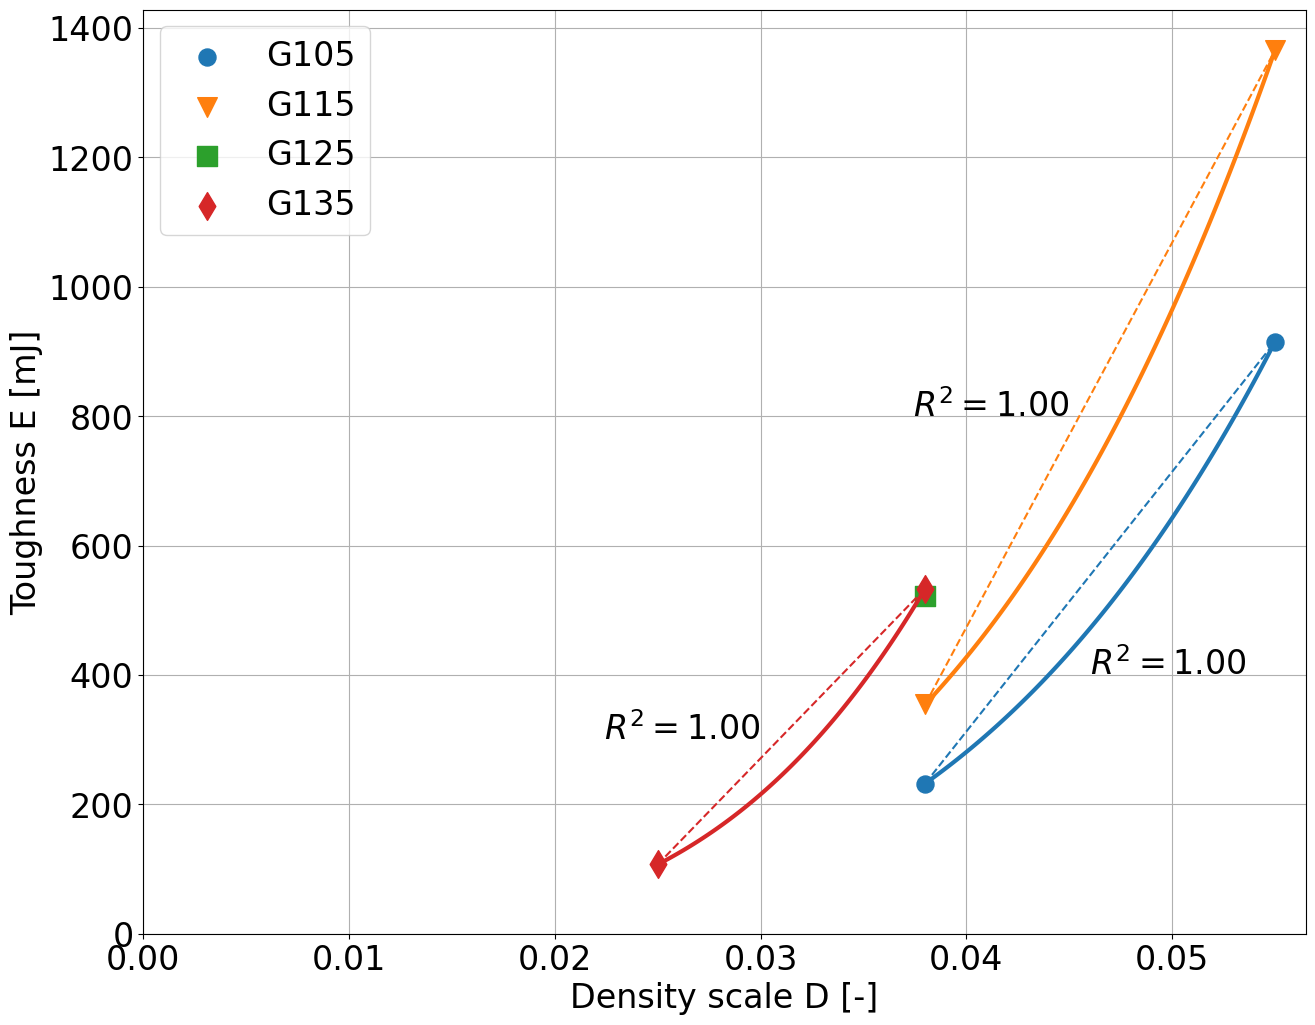

In [106]:
fig, (ax1) = plt.subplots(1,1, figsize=(15,12))

ax1.scatter(densities[1:3], e[0:2], label="G105", s=150)
ax1.scatter(densities[1:3],e[2:4], label="G115", s=200, marker = "v")
ax1.scatter(densities[1],e[4], label="G125", s=200, marker = "s")
ax1.scatter(densities[0:2],e[5:], label="G135", s=200, marker = "d")

ax1.plot(densities[1:3], e[0:2],  linewidth=1.5, linestyle = "dashed")
ax1.plot(densities[1:3],e[2:4],  linewidth=1.5, linestyle = "dashed")
ax1.plot(densities[1],e[4],  linewidth=1.5, linestyle = "dashed")
ax1.plot(densities[0:2],e[5:],  linewidth=1.5, linestyle = "dashed")

colors = ["C0", "C1", "C3", "C3"]

for i in range(3):
    ax1.plot(x_fit_values1[i+6], y_fit_values1[i+6], linewidth=3, c = colors[i])

ax1.text(0.045, 400, "  $R^2=1.00$")
ax1.text(0.045, 800, "$R^2=1.00$", ha = "right")
ax1.text(0.03, 300, "$R^2=1.00$", ha = "right")

"""
ax1.text(.025, e[5], " D.025 ", ha="right")

ax1.text(.038, e[0], "  D.038 ", ha="right")
ax1.text(.038, e[2], "  D.038 ", ha="right")
ax1.text(.038, e[4], "  D.038 ", ha="right", va="top")
ax1.text(.038, e[6], "  D.038 ", ha="right", va="bottom")

ax1.text(.055, e[1], "  D.055 ", ha="right")
ax1.text(.055, e[3], "  D.055 ", ha="right")
"""

ax1.set_xlabel("Density scale D [-]")
ax1.set_ylabel("Toughness E [mJ]")
ax1.legend(loc = "best")

ax1.grid()
ax1.set_xlim(0,None)
ax1.set_ylim(0,None)

## Geometry scale

In [51]:
geometries = [105, 115, 125, 135]

parameters_a2 = []
parameters_b2 = []
r_squared_values2 = []
x_fit_values2 = []
y_fit_values2 = []
for scale, data in zip([geometries, geometries[0:2], geometries, geometries[0:2], geometries, geometries[0:2],],
                       
                       [[k_all[0], k_all[2], k_all[4], k_all[6]],
                        [k_all[1], k_all[3]],

                         [strength[0], strength[2], strength[4], strength[6]],
                        [strength[1], strength[3]], 
                         [e[0], e[2], e[4], e[6]],
                        [e[1], e[3]]
                         ]):
    
    a_optimal, b_optimal, r_squared, x_fit, y_fit = plot_and_fit(scale, data)
    parameters_a2.append(a_optimal)
    parameters_b2.append(b_optimal)
    r_squared_values2.append(r_squared)
    x_fit_values2.append(x_fit)
    y_fit_values2.append(y_fit)


# Print the results
for i, (a, b, r_squared) in enumerate(zip(parameters_a2, parameters_b2, r_squared_values2), 1):
    #print(f"Curve {i}: a = {a:.4f}, b = {b:.2f}, R-squared = {r_squared:.2f}")
    print(f"Curve {i}: a = {a:.3}, b = {b:.2f}, R-squared = {r_squared:.3f}")
    print()


Curve 1: a = 0.0877, b = 1.71, R-squared = 0.911

Curve 2: a = 2.39, b = 1.12, R-squared = 1.000

Curve 3: a = 0.0046, b = 2.41, R-squared = 0.937

Curve 4: a = 0.00651, b = 2.52, R-squared = 1.000

Curve 5: a = 0.000229, b = 3.00, R-squared = 0.881

Curve 6: a = 1.15e-06, b = 4.40, R-squared = 1.000



c:\Users\Bruker\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\Users\Bruker\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\Users\Bruker\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Text(0, 0.5, 'Stiffness K [N/mm]')

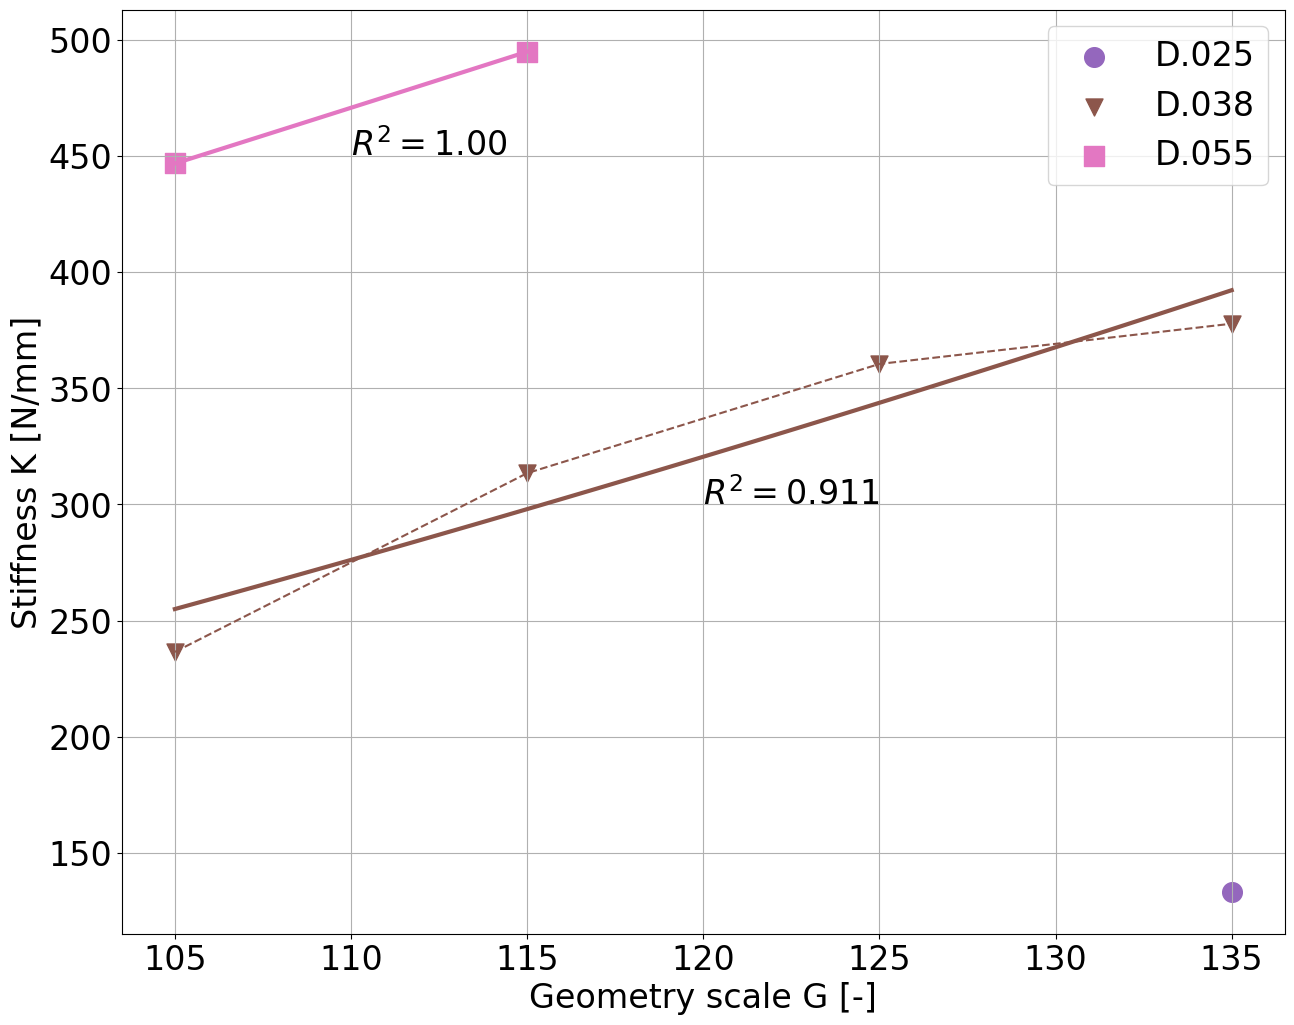

In [107]:
fig, (ax1) = plt.subplots(1,1, figsize=(15,12))
ax1.scatter(geometries[-1], k_all[-2], label="D.025", s=200, c="C4", marker="o")
ax1.scatter(geometries,  [k_all[0], k_all[2], k_all[4], k_all[6]], label="D.038", s=150, c="C5", marker="v" )
ax1.scatter(geometries[0:2], [k_all[1], k_all[3], ], label="D.055", s=200, c="C6", marker="s")


ax1.plot(geometries[-1], [ k_all[-2]], linewidth=1.5, linestyle="dashed", c="C4" )
ax1.plot(geometries[:], [k_all[0], k_all[2], k_all[4], k_all[6]], linewidth=1.5, linestyle="dashed", c="C5")
ax1.plot(geometries[0:2], [k_all[1], k_all[3]], linewidth=1.5, linestyle="dashed", c="C6")


colors = ["C5", "C6", "C7", "C3"]

for i in range(2):
    ax1.plot(x_fit_values2[i], y_fit_values2[i], linewidth=3, c = colors[i])


ax1.text(110, 450, "$R^2=1.00$", ha = "left")
ax1.text(120, 300, "$R^2=0.911$", ha = "left")

"""
ax1.text(105, k_all[0], "  G105 ", ha="left", va="top")
ax1.text(105, k_all[1], "  G105 ", ha="left", va="top")

ax1.text(115, k_all[2], "  G115 ", ha="left", va="top")
ax1.text(115, k_all[3], "  G115 ", ha="left", va="top")

ax1.text(125, k_all[4], "  G125 ", ha="left", va="top")

ax1.text(135, k_all[5], "  G135 ", ha="right")
ax1.text(135, k_all[6], " G135  ", ha="right")

"""

ax1.grid()
ax1.legend(ncols=1, loc="best")
ax1.set_xlabel("Geometry scale G [-]")
ax1.set_ylabel("Stiffness K [N/mm]")


Text(0, 0.5, 'Strength S [N]')

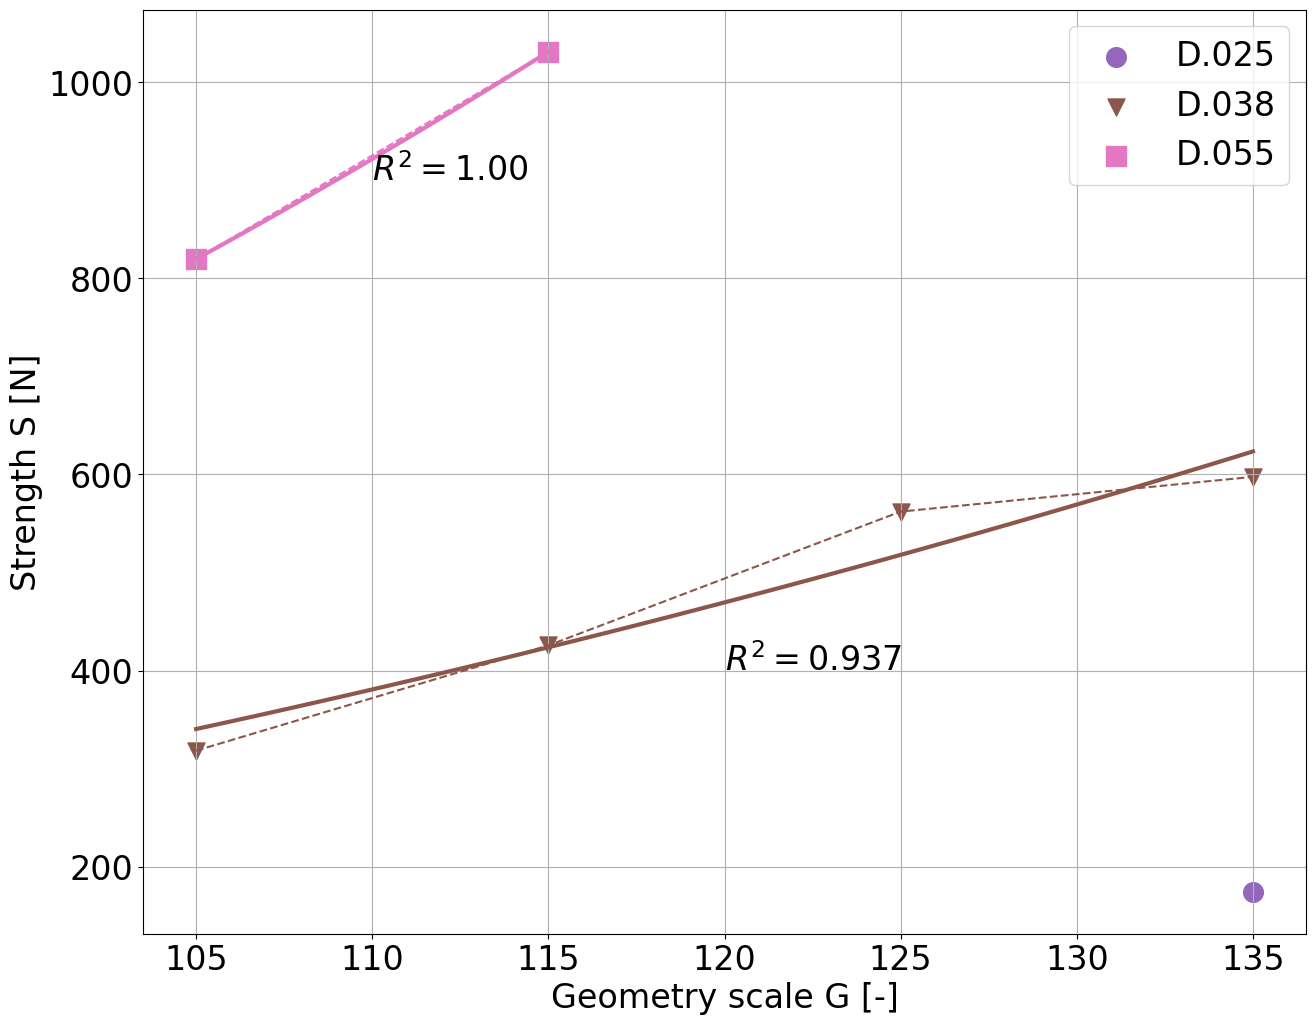

In [108]:
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 12))

# Scatter plots
ax1.scatter(geometries[-1], strength[-2], label="D.025", s=200, c="C4", marker="o")
ax1.scatter(geometries, [strength[0], strength[2], strength[4], strength[6]], label="D.038", s=150, c="C5", marker="v")
ax1.scatter(geometries[0:2], [strength[1], strength[3]], label="D.055", s=200, c="C6", marker="s")

# Line plots
ax1.plot(geometries[-1], [strength[-2]], linewidth=1.5, linestyle="dashed", c="C4")
ax1.plot(geometries[:], [strength[0], strength[2], strength[4], strength[6]], linewidth=1.5, linestyle="dashed", c="C5")
ax1.plot(geometries[0:2], [strength[1], strength[3]], linewidth=1.5, linestyle="dashed", c="C6")


colors = ["C5", "C6", "C7", "C3"]

for i in range(2):
    ax1.plot(x_fit_values2[i+2], y_fit_values2[i+2], linewidth=3, c=colors[i])

ax1.text(110, 900, "$R^2=1.00$", ha = "left")
ax1.text(120, 400, "$R^2=0.937$", ha = "left")

"""
ax1.text(105, strength[0], "  G105 ", ha="left", va="top")
ax1.text(105, strength[1], "  G105 ", ha="left", va="top")

ax1.text(115, strength[2], "  G115 ", ha="left", va="top")
ax1.text(115, strength[3], "  G115 ", ha="left", va="top")

ax1.text(125, strength[4], "  G125 ", ha="left", va="top")

ax1.text(135, strength[5], "  G135 ", ha="right")
ax1.text(135, strength[6], " G135  ", ha="right")

"""

ax1.grid()
ax1.legend(ncols=1, loc="best")
ax1.set_xlabel("Geometry scale G [-]")
ax1.set_ylabel("Strength S [N]")


Text(0, 0.5, 'Toughness E [mJ]')

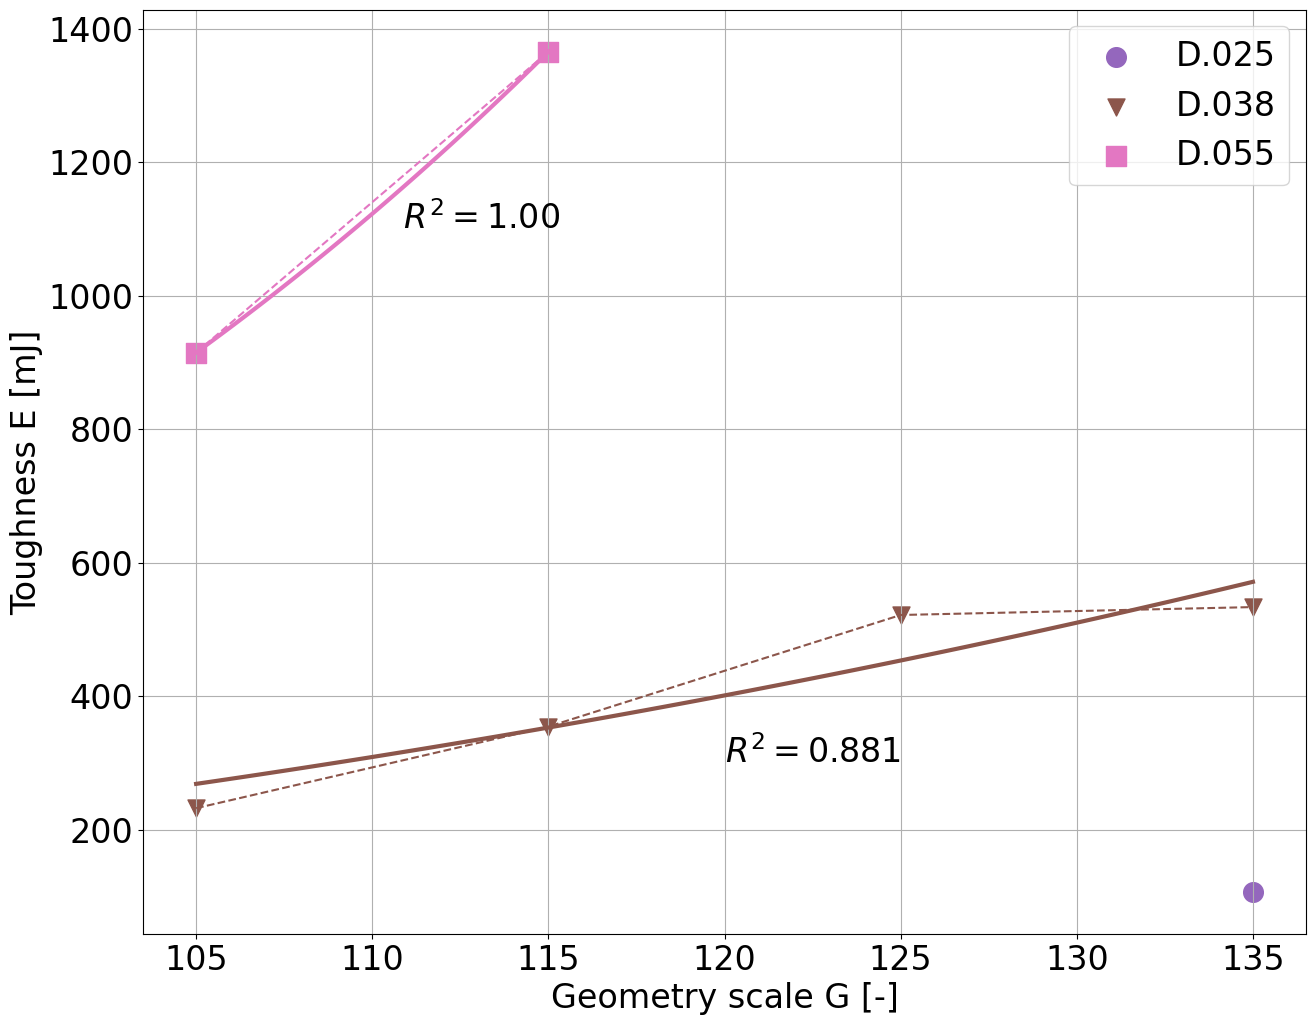

In [109]:
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 12))

# Scatter plots
ax1.scatter(geometries[-1], e[-2], label="D.025", s=200, c="C4", marker="o")
ax1.scatter(geometries, [e[0], e[2], e[4], e[6]], label="D.038", s=150, c="C5", marker="v")
ax1.scatter(geometries[0:2], [e[1], e[3]], label="D.055", s=200, c="C6", marker="s")

# Line plots
ax1.plot(geometries[-1], [e[-2]], linewidth=1.5, linestyle="dashed", c="C4")
ax1.plot(geometries[:], [e[0], e[2], e[4], e[6]], linewidth=1.5, linestyle="dashed", c="C5")
ax1.plot(geometries[0:2], [e[1], e[3]], linewidth=1.5, linestyle="dashed", c="C6")

colors = ["C5", "C6", "C7", "C3"]

for i in range(2):
    ax1.plot(x_fit_values2[i+4], y_fit_values2[i+4], linewidth=3, c=colors[i])

ax1.text(110, 1100, "   $R^2=1.00$", ha = "left")
ax1.text(120, 300, "$R^2=0.881$", ha = "left")
"""


ax1.text(105, e[0], "  G105 ", ha="left", va="top")
ax1.text(105, e[1], "  G105 ", ha="left", va="top")

ax1.text(115, e[2], "  G115 ", ha="left", va="top")
ax1.text(115, e[3], "  G115 ", ha="left", va="top")

ax1.text(125, e[4], "  G125 ", ha="left", va="bottom")

ax1.text(135, e[5], "  G135 ", ha="right")
ax1.text(135, e[6], " G135  ", ha="right", va="bottom")
"""

ax1.grid()
ax1.legend(ncols=1, loc="best")
ax1.set_xlabel("Geometry scale G [-]")
ax1.set_ylabel("Toughness E [mJ]")
